<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [46]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [47]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [13]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0.5, 1.0, 'Median value of owner-occupied homes')]

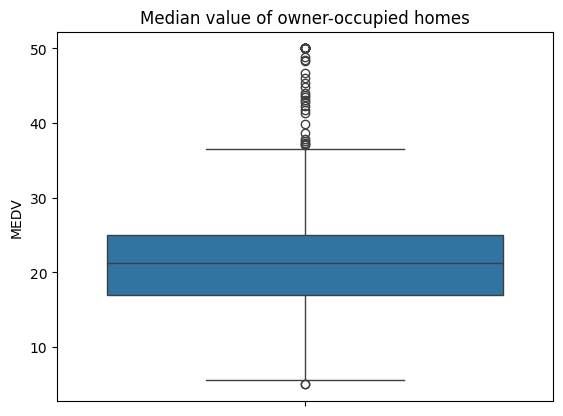

In [22]:

sns.boxplot(y='MEDV',data=df).set(title='Median value of owner-occupied homes')


[Text(0.5, 1.0, 'Effect of Charles River on Median Value of owner-occupied homes')]

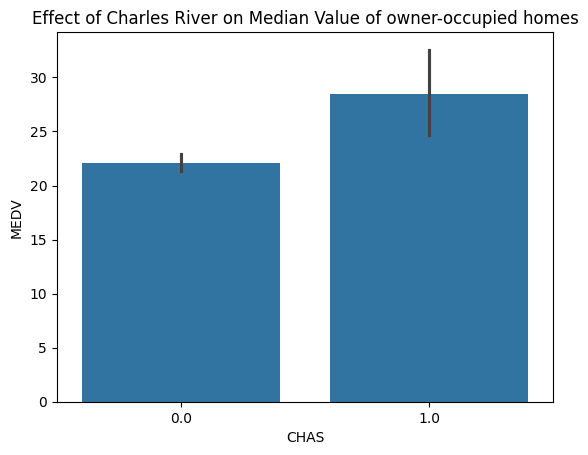

In [24]:
sns.barplot(x='CHAS', y='MEDV', data=df).set(title="Effect of Charles River on Median Value of owner-occupied homes")

In [27]:
df.loc[(df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70), 'age_group'] = '70 years and older'
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


[Text(0.5, 1.0, 'Effect of Age gropud on Median Value of owner-occupied homes')]

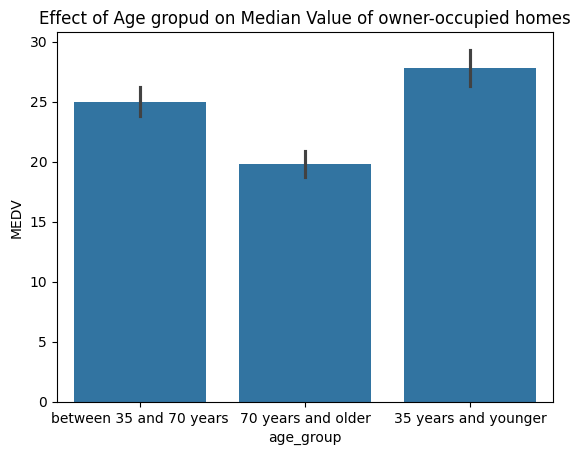

In [28]:
sns.barplot(x='age_group', y='MEDV', data=df).set(title="Effect of Age gropud on Median Value of owner-occupied homes")

[Text(0.5, 1.0, 'Relationship between Nitric oxide and INDUS*')]

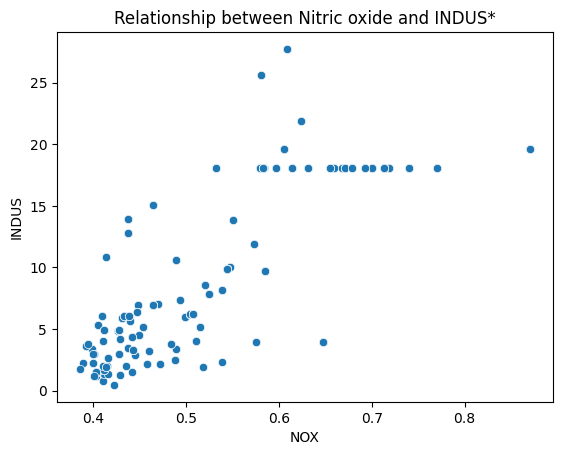

In [34]:
sns.scatterplot(x='NOX', y='INDUS', data=df).set(title="Relationship between Nitric oxide and INDUS*")

[Text(0.5, 1.0, 'Pupil-teacher ratio by town')]

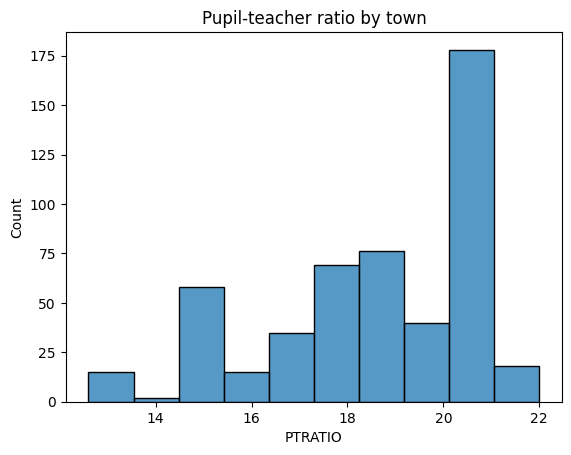

In [40]:
sns.histplot(x='PTRATIO', bins=10, kde=False, data=df).set(title="Pupil-teacher ratio by town")

In [49]:
df.loc[(df['CHAS'] == 0), 'CRiver'] = 'Far'
df.loc[(df['CHAS'] == 1), 'CRiver'] = 'Close'
df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CRiver
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Far
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Far
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Far
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Far
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Far


In [50]:
scipy.stats.ttest_ind(df[df['CRiver'] == 'Far']['MEDV'], 
                      df[df['CRiver'] == 'Close']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [52]:
print("Null hypo: There's no influence between the proximity to Charles river and the median value,\n Alternative Hypo: There IS influience between the proximity of the Charles river and the median value")

Null hypo: There's no influence between the proximity to Charles river and the median value,
 Alternative Hypo: There IS influience between the proximity of the Charles river and the median value


In [53]:
print("Given the pvalue of 7.39e-05, pvalue <0.005, the Null hypothesis is rejected")

Given the pvalue of 7.39e-05, pvalue <0.005, the Null hypothesis is rejected


In [54]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


In [56]:
print("Null hypo: There's no difference in the Median value of homes for each portion of ownerr occupied units prior to 1940,\n Alternative Hypo: There IS difference in the Median value of homes for each portion of ownerr occupied units prior to 1940\n")
print("Given the pvalue of 1.57e-18, pvalue <0.005, the Null hypothesis is rejected")

Null hypo: There's no difference in the Median value of homes for each portion of ownerr occupied units prior to 1940,
 Alternative Hypo: There IS difference in the Median value of homes for each portion of ownerr occupied units prior to 1940

Given the pvalue of 1.57e-18, pvalue <0.005, the Null hypothesis is rejected


In [57]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [58]:
print("Null hypo: There's no correlation between NOX* and INDUS*,\n Alternative Hypo: There IS a correlation between NOX* and INDUS*\n")
print("Given the pvalue of 7.92e-98, pvalue <0.005, the Null hypothesis is rejected")

Null hypo: There's no correlation between NOX* and INDUS*,
 Alternative Hypo: There IS a correlation between NOX* and INDUS*

Given the pvalue of 7.92e-98, pvalue <0.005, the Null hypothesis is rejected


In [68]:
X = df['DIS']
## y is the target/dependent variable
y = df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        16:31:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
print("Given the square root of R-squared is ", np.sqrt(0.062), " a week correletation between the weighted distance and the median value can be inferred")

Given the square root of R-squared is  0.24899799195977465  a week correletation between the weighted distance and the median value can be inferred
